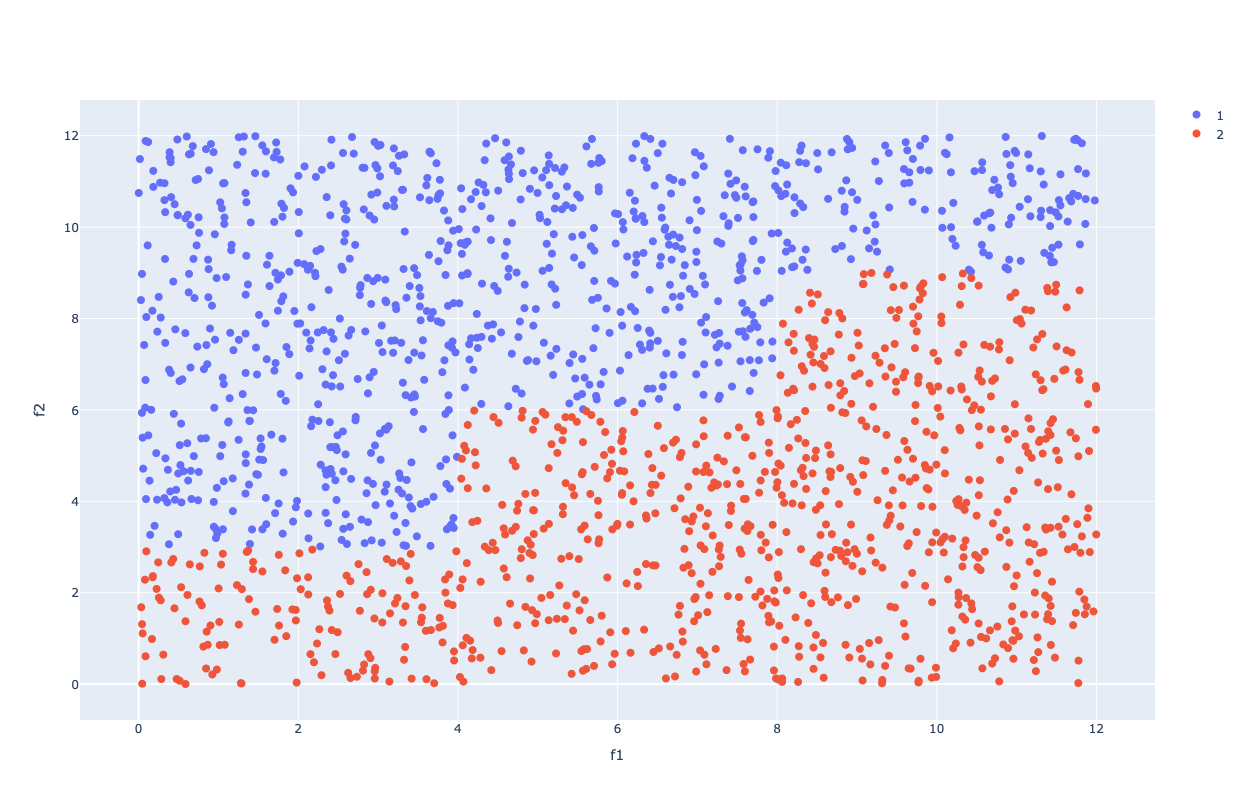

In [55]:
import scipy.io as sio
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

#Load data for training
data = sio.loadmat("StairData.mat")
X=data['data'][0][0][2]
y=data['data'][0][0][3].squeeze()

y=y.astype(int)

#Identify class indexes
ixW1=np.where(y==1)[0]
ixW2=np.where(y==2)[0]

y[ixW2]=-1


#Plot samples
fig=go.Figure()
fig.add_trace(go.Scatter(x=X[0,ixW1],y=X[1,ixW1],name='1'))
fig.add_trace(go.Scatter(x=X[0,ixW2],y=X[1,ixW2],name='2'))
fig.update_traces(marker=dict(size=8))
fig.update_traces(mode='markers')
fig.update_xaxes(title_text="f1")
fig.update_yaxes(title_text="f2")
fig.update_layout(autosize=False,width=900,height=800)
fig.show()

Xtr, Xte, ytr, yte = train_test_split(X.T, y, train_size=0.7)

#Identify class indexes
ixW1Tr=np.where(ytr==1)[0]
ixW2Tr=np.where(ytr==-1)[0]

ixW1Te=np.where(yte==1)[0]
ixW2Te=np.where(yte==-1)[0]



In [56]:
from   sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree


def trainAdaboost(Xtr,ytr,nMod):
    models= np.arange(nMod, dtype=DecisionTreeClassifier)
    N=Xtr.shape[0]
    w=np.ones((N))*(1/N)
    alphas=np.zeros((nMod))
    
    for i in range(nMod):
        mdl=DecisionTreeClassifier(criterion='gini',max_depth=1)
        mdl.fit(Xtr,ytr,sample_weight=w)
        pred=mdl.predict(Xtr)
        models[i]=mdl
        err=sum(w*np.heaviside(-ytr*pred,1))
        alpha=0.5*np.log((1-err)/err)
        models[i].alpha=alpha
        v=np.zeros((N))
        for j in range(N):
            v[j]=w[j]*np.exp(-alpha*ytr[j]*pred[j])
        
        Sm=np.sum(v);
        w=v/Sm;
    return models


def testAdaboost(Xte,yte,models):
    
    nMod=models.shape[0]
    nsamp=Xte.shape[0]
    
    predTot=np.zeros((nMod,nsamp))
    decisionTot=np.zeros((nMod,nsamp))
    for m in range(nMod):
        label=models[m].predict(Xte)
        predTot[m,:]=models[m].alpha*label
    return np.sign(np.sum(predTot,0))


#==========================Main Script==================================
#Number of models
nMod=5;
models=trainAdaboost(Xtr,ytr,nMod)

predTrain=testAdaboost(Xtr,ytr,models)
predTest=testAdaboost(Xte,yte,models)


#Identify class indexes after prediction
ixW1pTr=np.where(predTrain==1)[0]
ixW2pTr=np.where(predTrain==-1)[0]

#Identify class indexes after prediction
ixW1pTe=np.where(predTest==1)[0]
ixW2pTe=np.where(predTest==-1)[0]


hitsTr=np.sum(predTrain==ytr)
ACTrain=hitsTr/Xtr.T.shape[1]

hitsTe=np.sum(predTest==yte)
ACTest=hitsTe/Xte.T.shape[1]


print("Accuracy Train="+str(ACTrain))
print("Accuracy Test="+str(ACTest))


Accuracy Train=0.9880668257756563
Accuracy Test=0.9888888888888889


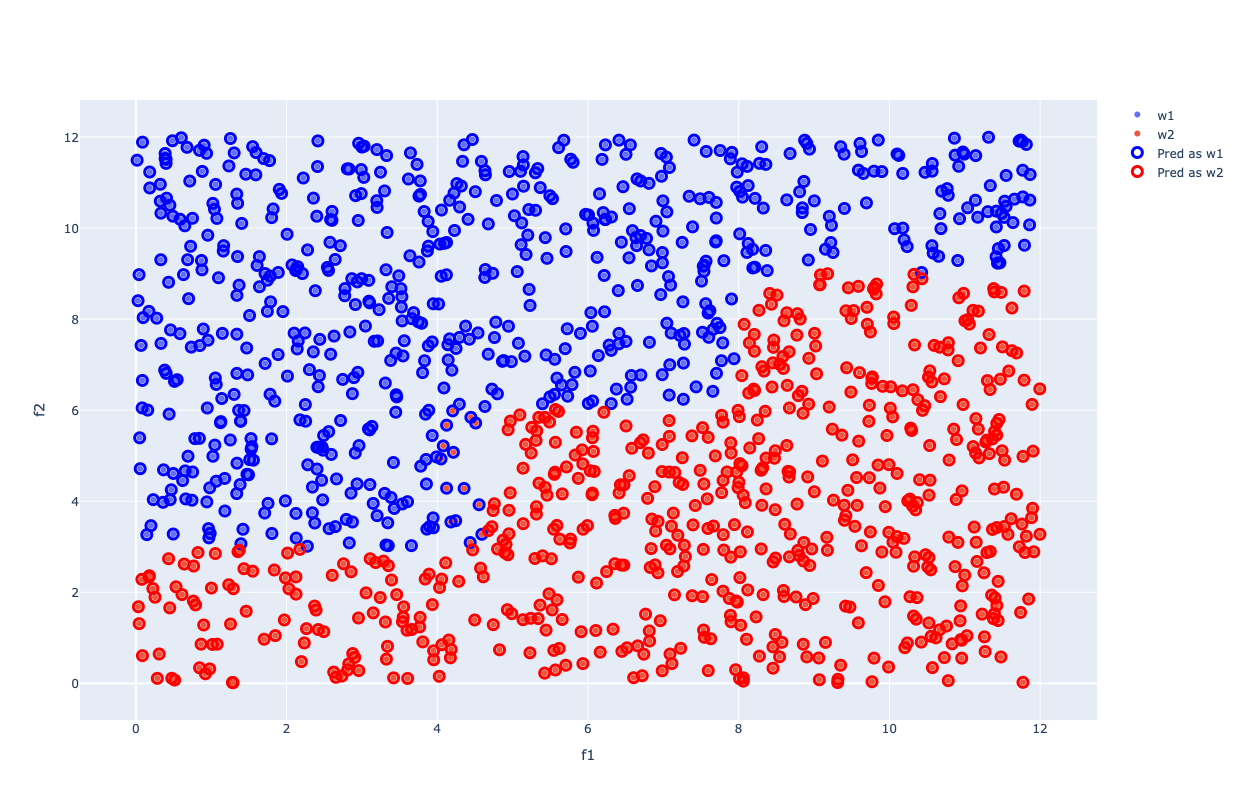

In [57]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Xtr.T[0, ixW1Tr],y=Xtr.T[1, ixW1Tr],name='w1'))
fig.add_trace(go.Scatter(x=Xtr.T[0, ixW2Tr],y=Xtr.T[1, ixW2Tr],name='w2'))


fig.add_trace(go.Scatter(x=Xtr.T[0, ixW1pTr],y=Xtr.T[1, ixW1pTr],name='Pred as w1',
                         marker_size=10,marker_symbol="circle-open",marker=dict(color="blue",
                                                                                line=dict(width=3,color='blue'))))
fig.add_trace(go.Scatter(x=Xtr.T[0, ixW2pTr],y=Xtr.T[1, ixW2pTr],name='Pred as w2',
                         marker_size=10,marker_symbol="circle-open",marker=dict(color="red",
                                                                                line=dict(width=3,color='red'))))
fig.update_traces(mode='markers')
fig.update_xaxes(title_text="f1")
fig.update_yaxes(title_text="f2")
fig.update_layout(autosize=False,width=900,height=800)
fig.show()

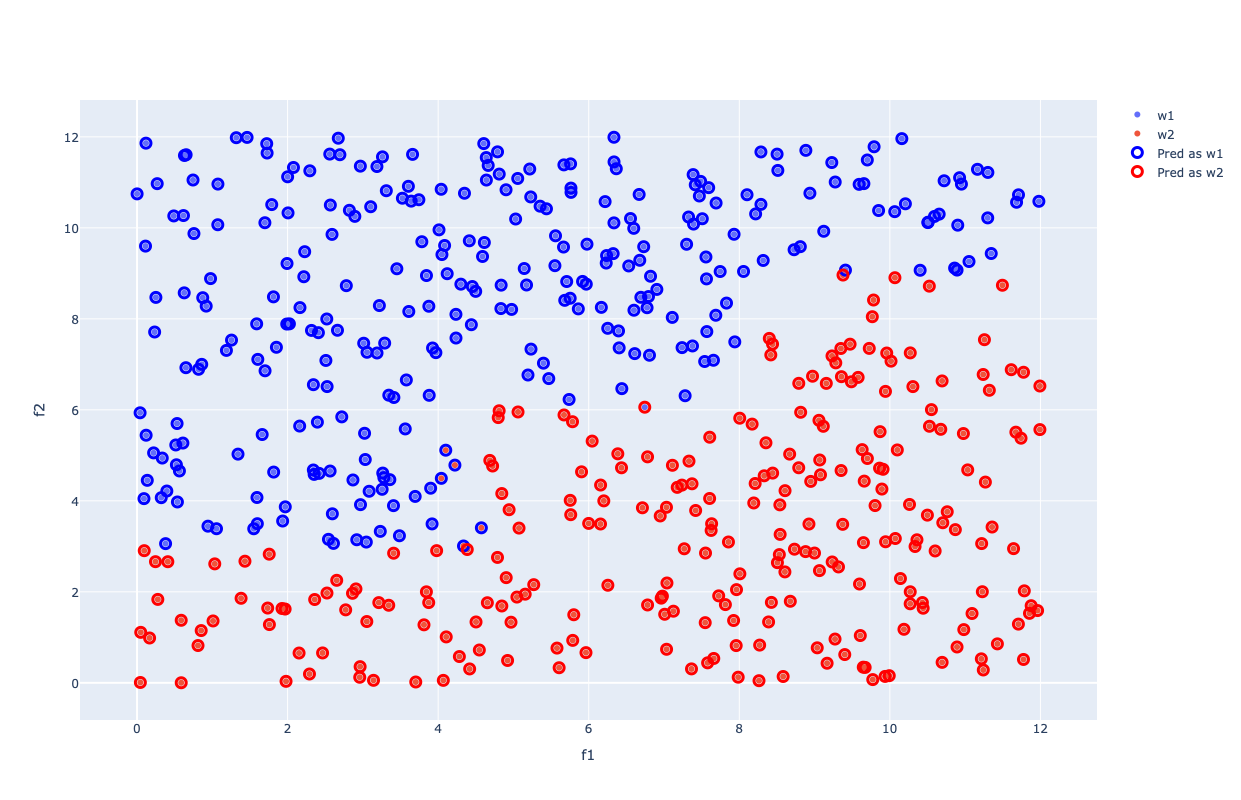

In [58]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Xte.T[0, ixW1Te],y=Xte.T[1, ixW1Te],name='w1'))
fig.add_trace(go.Scatter(x=Xte.T[0, ixW2Te],y=Xte.T[1, ixW2Te],name='w2'))


fig.add_trace(go.Scatter(x=Xte.T[0, ixW1pTe],y=Xte.T[1, ixW1pTe],name='Pred as w1',
                         marker_size=10,marker_symbol="circle-open",marker=dict(color="blue",
                                                                                line=dict(width=3,color='blue'))))
fig.add_trace(go.Scatter(x=Xte.T[0, ixW2pTe],y=Xte.T[1, ixW2pTe],name='Pred as w2',
                         marker_size=10,marker_symbol="circle-open",marker=dict(color="red",
                                                                                line=dict(width=3,color='red'))))
fig.update_traces(mode='markers')
fig.update_xaxes(title_text="f1")
fig.update_yaxes(title_text="f2")
fig.update_layout(autosize=False,width=900,height=800)
fig.show()